In [2]:
!pip install seaborn --user

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [4]:
# Set visualization theme
sns.set()

In [5]:
data_set = pd.read_csv(r"C:\Users\TestimOni\OneDrive - Ulster University\Desktop\OptimumJewelryPricing\Data\Jewelry_Dataset.csv")
# df = pd.read_csv(r"C:\Users\TestimOni\OneDrive - Ulster University\Desktop\OptimumJewelryPricing\Data\Jewelry_Dataset.csv")

In [6]:
data_set.head()

,2018-12-01 11:40:29 UTC,1924719191579951782,1842195256808833386,1,1806829201890738522,jewelry.earring,0,561.51,1515915625207851155,Unnamed: 9,red,gold,diamond
0,2018-12-01 17:38:31 UTC,1924899396621697920,1806829193678291446,1,1.806829e+18,NaN,NaN,212.14,1.515916e+18,NaN,yellow,gold,NaN
1,2018-12-02 13:53:42 UTC,1925511016616034733,1842214461889315556,1,1.806829e+18,jewelry.pendant,1.0,54.66,1.515916e+18,f,white,gold,sapphire
2,2018-12-02 17:44:02 UTC,1925626951238681511,1835566849434059453,1,1.806829e+18,jewelry.pendant,0.0,88.90,1.515916e+18,f,red,gold,diamond
3,2018-12-02 21:30:19 UTC,1925740842841014667,1873936840742928865,1,1.806829e+18,jewelry.necklace,0.0,417.67,1.515916e+18,NaN,red,gold,amethyst
4,2018-12-02 22:09:34 UTC,1925760595336888995,1835566854827934449,1,1.806829e+18,jewelry.earring,1.0,102.27,1.515916e+18,NaN,red,gold,NaN


In [7]:
data_set.shape

(95910, 13)

In [8]:
# Set the columns for the data (df) for better readability using the provided dictionary
data_set.columns = [
    "Order_DateTime",
    "Order_ID",
    "Product_ID",
    "SKU_Quantity",
    "Category_ID",
    "Category_Alias",
    "Brand_ID",
    "Price_in_USD",
    "User_ID",
    "Product_Gender",
    "Main_Color",
    "Main_Metal",
    "Main_Gem"]

In [9]:
data_set.head()

,Order_DateTime,Order_ID,Product_ID,SKU_Quantity,Category_ID,Category_Alias,Brand_ID,Price_in_USD,User_ID,Product_Gender,Main_Color,Main_Metal,Main_Gem
0,2018-12-01 17:38:31 UTC,1924899396621697920,1806829193678291446,1,1.806829e+18,NaN,NaN,212.14,1.515916e+18,NaN,yellow,gold,NaN
1,2018-12-02 13:53:42 UTC,1925511016616034733,1842214461889315556,1,1.806829e+18,jewelry.pendant,1.0,54.66,1.515916e+18,f,white,gold,sapphire
2,2018-12-02 17:44:02 UTC,1925626951238681511,1835566849434059453,1,1.806829e+18,jewelry.pendant,0.0,88.90,1.515916e+18,f,red,gold,diamond
3,2018-12-02 21:30:19 UTC,1925740842841014667,1873936840742928865,1,1.806829e+18,jewelry.necklace,0.0,417.67,1.515916e+18,NaN,red,gold,amethyst
4,2018-12-02 22:09:34 UTC,1925760595336888995,1835566854827934449,1,1.806829e+18,jewelry.earring,1.0,102.27,1.515916e+18,NaN,red,gold,NaN


In [10]:
# check for and count missing values
data_set.isnull().sum()
# data_set.isnull().value_counts()

Order_DateTime        0
Order_ID              0
Product_ID            0
SKU_Quantity          0
Category_ID        5352
Category_Alias     9933
Brand_ID           4785
Price_in_USD       5352
User_ID            5352
Product_Gender    48167
Main_Color         7660
Main_Metal         5462
Main_Gem          34058
dtype: int64

In [332]:
# When exploring the data, it is good to check its FEATURE CARDINALITY
data_set.nunique()

2018-12-01 11:40:29 UTC    74504
1924719191579951782        74759
1842195256808833386         9613
1                              1
1806829201890738522           25
jewelry.earring              218
0                           2537
561.51                      3166
1515915625207851155        31079
Unnamed: 9                     2
red                            5
gold                           3
diamond                       30
dtype: int64

In [394]:
# Get a statistical summary of the data
data_set.describe()

,Order_ID,Product_ID,SKU_Quantity,Category_ID,Brand_ID,Price_in_USD,User_ID,Year,Month
count,7.808700e+04,7.808700e+04,78087.0,7.808700e+04,74719.000000,78087.000000,7.808700e+04,78087.000000,78087.000000
mean,2.473234e+18,1.825199e+18,1.0,1.806160e+18,0.634591,353.715579,1.512538e+18,2020.428753,7.202953
std,1.929789e+17,2.114342e+17,0.0,1.815732e+16,0.690533,444.929898,2.411510e+16,0.723226,3.505926
min,1.925511e+18,1.313551e+18,1.0,1.313678e+18,0.000000,0.990000,1.313554e+18,2018.000000,1.000000
25%,2.370276e+18,1.515966e+18,1.0,1.806829e+18,0.000000,143.700000,1.515916e+18,2020.000000,4.000000
50%,2.512252e+18,1.956664e+18,1.0,1.806829e+18,1.000000,253.290000,1.515916e+18,2021.000000,8.000000
75%,2.632689e+18,1.956664e+18,1.0,1.806829e+18,1.000000,417.670000,1.515916e+18,2021.000000,10.000000
max,2.719022e+18,2.541962e+18,1.0,1.806829e+18,5.000000,34448.600000,1.554297e+18,2021.000000,12.000000


In [334]:
# also
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95910 entries, 0 to 95909
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   2018-12-01 11:40:29 UTC  95910 non-null  object 
 1   1924719191579951782      95910 non-null  int64  
 2   1842195256808833386      95910 non-null  int64  
 3   1                        95910 non-null  int64  
 4   1806829201890738522      90558 non-null  float64
 5   jewelry.earring          85977 non-null  object 
 6   0                        91125 non-null  float64
 7   561.51                   90558 non-null  float64
 8   1515915625207851155      90558 non-null  float64
 9   Unnamed: 9               47743 non-null  object 
 10  red                      88250 non-null  object 
 11  gold                     90448 non-null  object 
 12  diamond                  61852 non-null  object 
dtypes: float64(4), int64(3), object(6)
memory usage: 9.5+ MB


In [335]:
# Check duplicate values
duplicate_entries = len(data_set.loc[data_set.duplicated()])
duplicate_entries

2589

In [336]:
data_set.duplicated().sum()

2589

In [337]:
data_set.shape

(95910, 13)

In [338]:
data_set = data_set.drop_duplicates()

In [353]:
data_set.shape

(93321, 13)

In [352]:
# Invarian features: Features with cadinality of 1
data_set.columns[data_set.nunique() <= 1].tolist()

['SKU_Quantity']

In [354]:
# Check for label distribution
label_distribution = data_set["Price_in_USD"].skew()
label_distribution

18.919793378274285

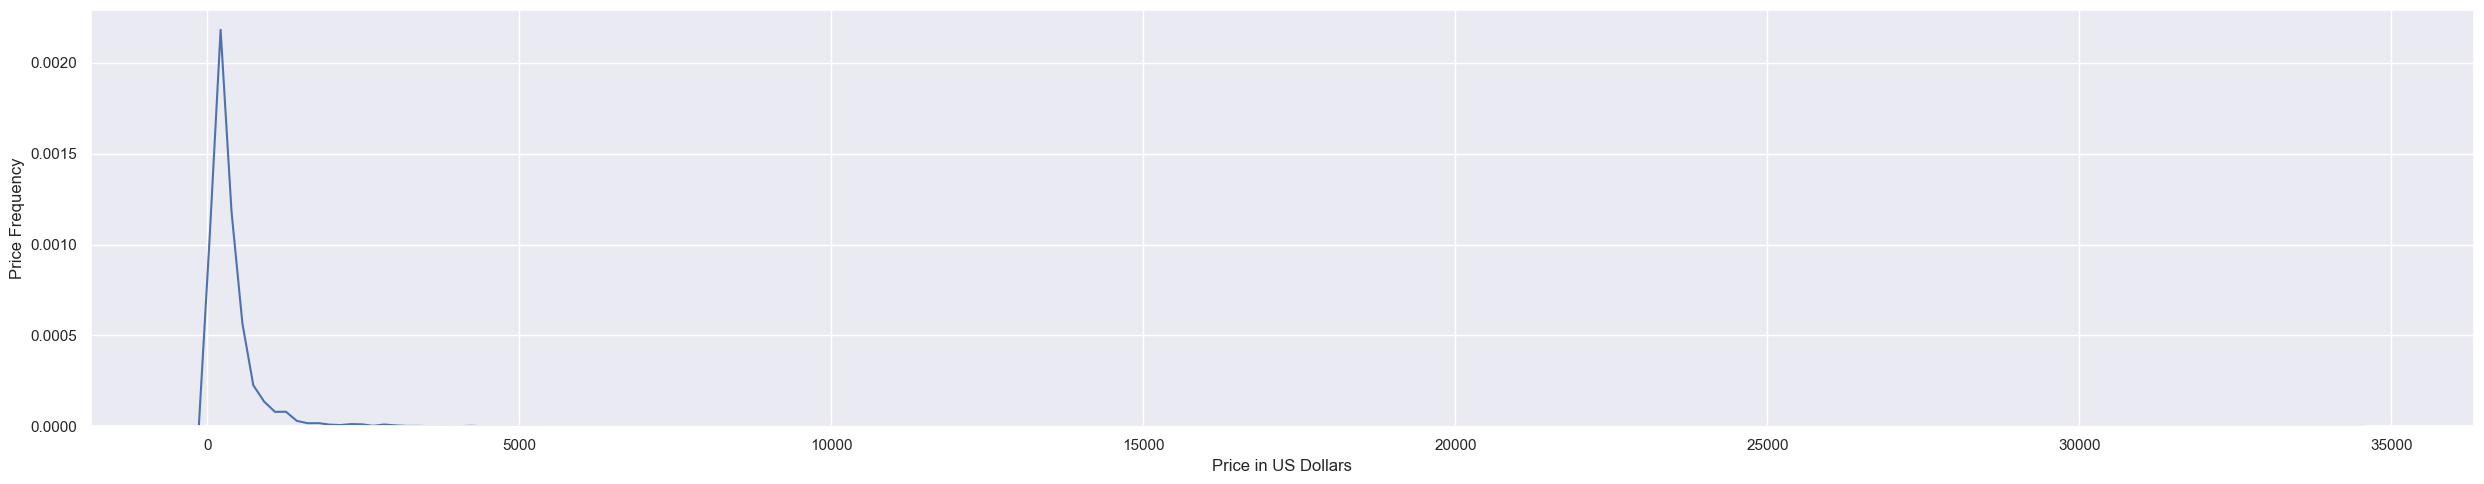

In [355]:
# The price (the label feature) in the data has a high skew.
# Let's visualize it
plt.figure(figsize = (25, 5))
sns.kdeplot(data = data_set, x = "Price_in_USD") # Kernel Density Estimate (KDE) Plot
plt.xlabel("Price in US Dollars")
plt.ylabel("Price Frequency")
plt.tight_layout()
plt.show(); plt.close()

In [356]:
# Price kurtosis
data_set["Price_in_USD"].kurtosis()

1044.1569649991407

<AxesSubplot:xlabel='Price_in_USD', ylabel='Density'>

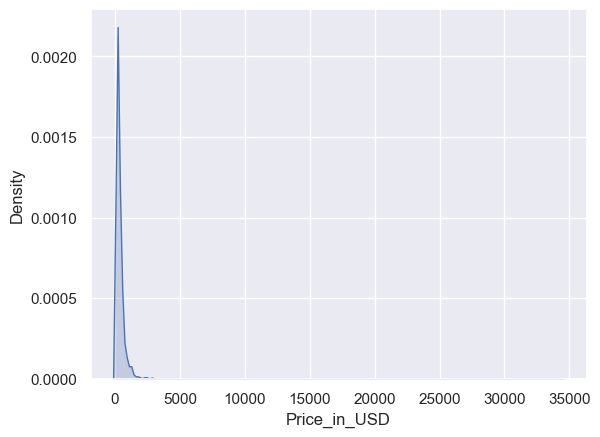

In [357]:
sns.kdeplot(data_set['Price_in_USD'], fill=True)

In [358]:
data_set['Price_in_USD'].describe()

count    88089.000000
mean       363.583797
std        448.344088
min          0.990000
25%        143.700000
50%        259.970000
75%        431.370000
max      34448.600000
Name: Price_in_USD, dtype: float64

In [359]:
# Target gender analysis
data_set["Product_Gender"].value_counts()

f    46687
m      359
Name: Product_Gender, dtype: int64

In [260]:
# In percentage
data_set["Product_Gender"].value_counts(normalize = True)

f    0.992369
m    0.007631
Name: Product_Gender, dtype: float64

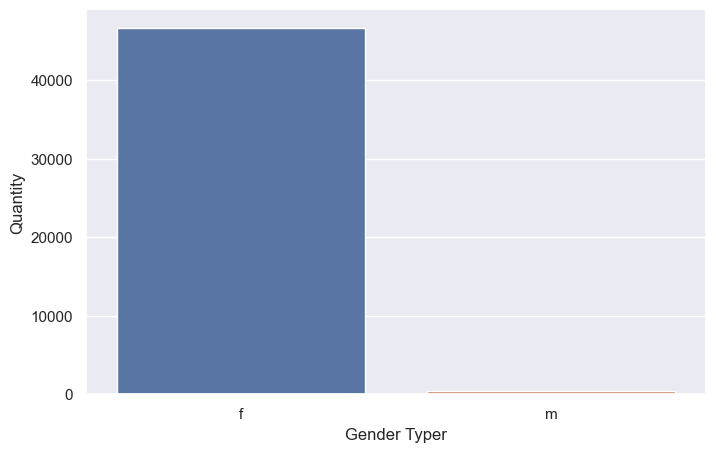

In [360]:
# Visualize gender distribution. Xtreme one-sided gender distribution
plt.figure(figsize = (8, 5))
sns.countplot(data = data_set, x = "Product_Gender")
plt.xlabel("Gender Typer")
plt.ylabel("Quantity")
plt.show(); plt.close()

In [361]:
# Jewelry Category analysis: We have 2 features pointing to categories: ID and ALIAS
data_set["Category_ID"].nunique()

25

In [362]:
data_set["Category_ID"].unique()

array([1.80682920e+18, 1.80682920e+18, 1.80682920e+18, 1.80682920e+18,
       1.80682920e+18, 1.80682920e+18, 1.80682920e+18, 1.80682920e+18,
       1.80682920e+18,            nan, 1.80682920e+18, 1.31367763e+18,
       1.31367763e+18, 1.31367763e+18, 1.80682920e+18, 1.80682920e+18,
       1.80682920e+18, 1.31367763e+18, 1.31367763e+18, 1.31367763e+18,
       1.31367763e+18, 1.31367763e+18, 1.31367763e+18, 1.31367763e+18,
       1.31367763e+18, 1.31367763e+18])

In [363]:
data_set["Category_Alias"].nunique()

218

In [364]:
# From the above, we need to look deeper into the data.
# It doesn't look like the 'Category ID' (25) and 'Category ALIAS' (218) are pointing to the same data
data_set["Category_Alias"].unique()

array([nan, 'jewelry.pendant', 'jewelry.necklace', 'jewelry.earring',
       'jewelry.ring', 'jewelry.brooch', 'jewelry.bracelet',
       'electronics.clocks', 'jewelry.souvenir', '230.12', '202.36',
       '1098.03', '321.78', '1128.62', '81.27', '34.25', '582.16',
       '227.37', '234.22', '150.55', '131.82', '2123.15', '109.45',
       '49.22', '472.47', '205.38', '2746.44', '51.08', '231.12', '76.97',
       '3054.73', '184.90', '380.10', '357.49', '15.47', '135.33',
       '719.75', '93.01', '177.95', 'jewelry.stud', '102.10', '595.75',
       '469.56', '427.07', '53.62', '77.53', '1469.18', '355.27',
       '184.89', '154.66', '300.58', '83.73', '271.19', '3294.21',
       '278.04', '3626.26', '126.03', '283.52', '114.38', '89.04', '8.22',
       '124.88', '89.73', '171.23', '136.93', '19.04', '158.77', '187.10',
       '151.92', '1845.89', '87.23', '248.58', '596.48', '208.88',
       '193.11', '169.84', '1447.68', '45.07', '136.85', '282.05',
       '61.51', '210.21', '137.12'

In [365]:
# Lets extract the actual categories by eliminating the corrupted ones
categories = data_set["Category_Alias"].unique().tolist()
categories = [c for c in categories if isinstance(c, str) and "jewelry" in c]
print(categories, '\n\n', len(categories), 'unique categories.')

['jewelry.pendant', 'jewelry.necklace', 'jewelry.earring', 'jewelry.ring', 'jewelry.brooch', 'jewelry.bracelet', 'jewelry.souvenir', 'jewelry.stud'] 

 8 unique categories.


In [366]:
# Percentage of missing values in fields of data set
data_set.isnull().sum() * 100 / len(data_set)

Order_DateTime     0.000000
Order_ID           0.000000
Product_ID         0.000000
SKU_Quantity       0.000000
Category_ID        5.606455
Category_Alias    10.541036
Brand_ID           5.009591
Price_in_USD       5.606455
User_ID            5.606455
Product_Gender    49.586910
Main_Color         7.797816
Main_Metal         5.721113
Main_Gem          34.756379
dtype: float64

In [367]:
# Remove the corruptedcategories
data_set = data_set.loc[data_set["Category_Alias"].isin(categories)]
data_set.shape

(78087, 13)

In [368]:
data_set["Category_ID"].nunique()

16

In [369]:
data_set["Category_ID"].unique()

array([1.80682920e+18, 1.80682920e+18, 1.80682920e+18, 1.80682920e+18,
       1.80682920e+18, 1.80682920e+18, 1.80682920e+18, 1.31367763e+18,
       1.31367763e+18, 1.80682920e+18, 1.31367763e+18, 1.31367763e+18,
       1.31367763e+18, 1.31367763e+18, 1.31367763e+18, 1.31367763e+18])

In [271]:
# After triming, unique category alias and unique category ID are still not the same.
# The data integrity needs to be proved. A better, cleaner data set may be the way out.

In [370]:
# Percentage of missing values in fields of the trimed data set
data_set.isnull().sum() * 100 / len(data_set)

Order_DateTime     0.000000
Order_ID           0.000000
Product_ID         0.000000
SKU_Quantity       0.000000
Category_ID        0.000000
Category_Alias     0.000000
Brand_ID           4.313138
Price_in_USD       0.000000
User_ID            0.000000
Product_Gender    44.018851
Main_Color         2.401168
Main_Metal         0.110134
Main_Gem          23.158784
dtype: float64

In [ ]:
# The missing values reduced. It may mean that majority of the missing values are due to the Category data corruption

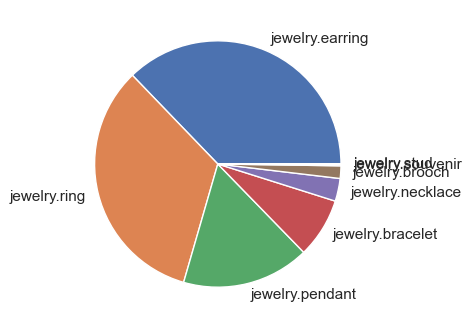

In [371]:
# Jewelry category distribution visualization
subdata = data_set["Category_Alias"].value_counts()
jewelry_categories, counts = subdata.index.tolist(), subdata.values.tolist()
plt.figure(figsize = (6, 4))
plt.pie(x = counts, labels = jewelry_categories)
plt.show(); plt.close()

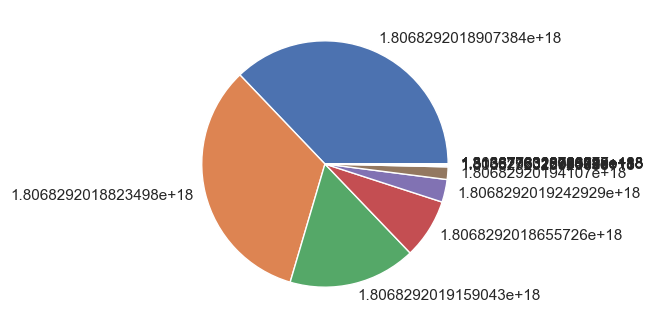

In [372]:
# Brand_ID
subdata = data_set["Category_ID"].value_counts()
jewelry_catIDs, counts = subdata.index.tolist(), subdata.values.tolist()
plt.figure(figsize = (6, 4))
plt.pie(x = counts, labels = jewelry_catIDs)
plt.show(); plt.close()

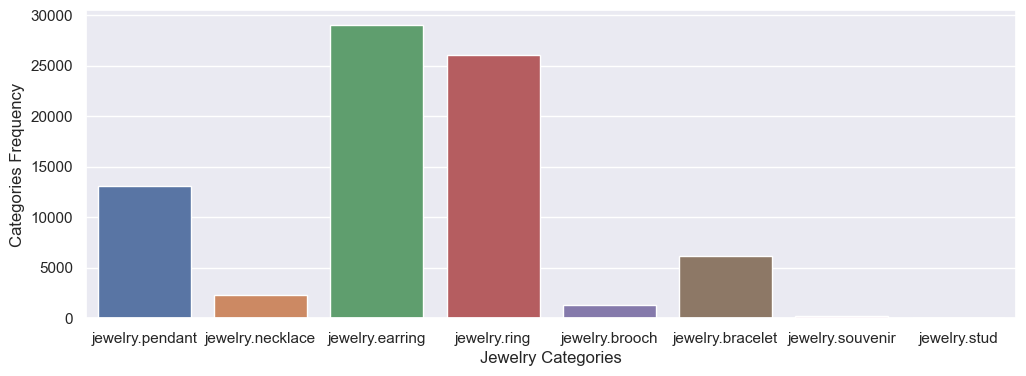

(None, <function matplotlib.pyplot.close(fig=None)>)

In [373]:
# Category count plot
plt.figure(figsize = (12, 4))
sns.countplot(data = data_set, x = "Category_Alias")
plt.xlabel("Jewelry Categories")
plt.ylabel("Categories Frequency")
plt.show(), plt.close

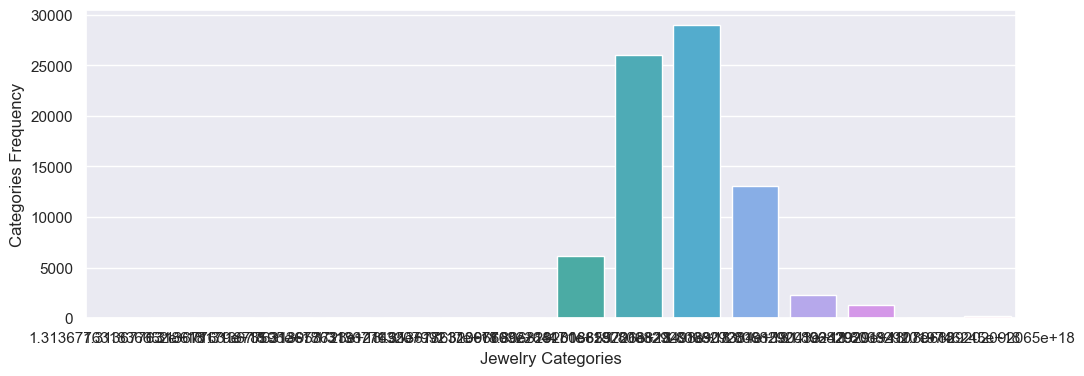

(None, <function matplotlib.pyplot.close(fig=None)>)

In [374]:
plt.figure(figsize = (12, 4))
sns.countplot(data = data_set, x = "Category_ID")
plt.xlabel("Jewelry Categories")
plt.ylabel("Categories Frequency")
plt.show(), plt.close

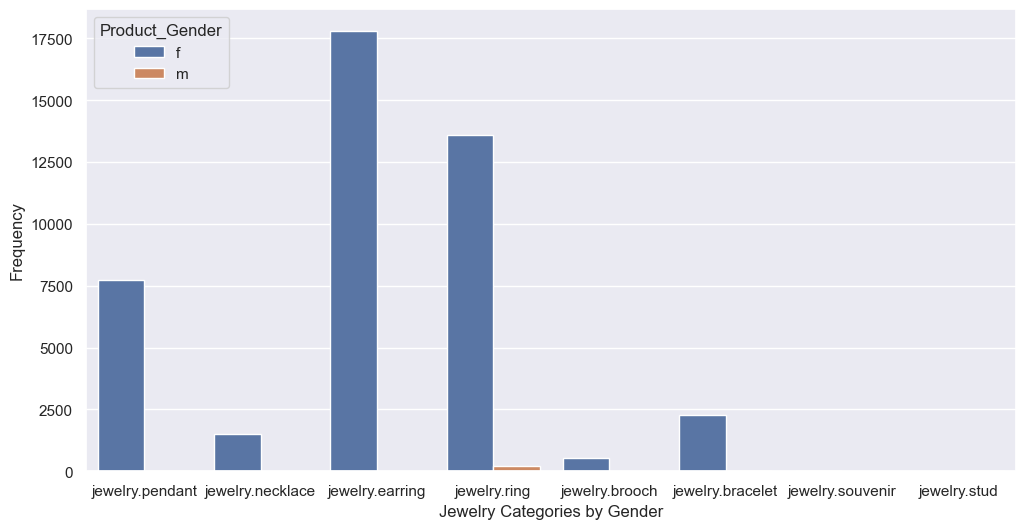

In [375]:
# Category representation with respect to gender
plt.figure(figsize = (12, 6))
sns.countplot(data = data_set, x = "Category_Alias", hue = "Product_Gender")
plt.xlabel("Jewelry Categories by Gender")
plt.ylabel("Frequency")
plt.show(); plt.close()

In [376]:
# DateTime analysis - see if price varies with month of the year
# Get YearOfOrder an OrderMonth from the DateTime column

# Ensure the column is parsed as datetime
data_set['Order_DateTime'] = pd.to_datetime(data_set['Order_DateTime'], utc=True)

# Create new columns for year and month
data_set['Year'] = data_set['Order_DateTime'].dt.year
data_set['Month'] = data_set['Order_DateTime'].dt.month

C:\Users\TestimOni\AppData\Local\Temp\ipykernel_20492\1431558462.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_set['Order_DateTime'] = pd.to_datetime(data_set['Order_DateTime'], utc=True)
C:\Users\TestimOni\AppData\Local\Temp\ipykernel_20492\1431558462.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_set['Year'] = data_set['Order_DateTime'].dt.year
C:\Users\TestimOni\AppData\Local\Temp\ipykernel_20492\1431558462.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

In [378]:
data_set.columns

Index(['Order_DateTime', 'Order_ID', 'Product_ID', 'SKU_Quantity',
       'Category_ID', 'Category_Alias', 'Brand_ID', 'Price_in_USD', 'User_ID',
       'Product_Gender', 'Main_Color', 'Main_Metal', 'Main_Gem', 'Year',
       'Month'],
      dtype='object')

In [380]:
data_set["Month"].nunique()

12

In [381]:
data_set["Month"].unique()

array([12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [382]:
data_set["Year"].nunique()

4

In [383]:
data_set["Year"].unique()

array([2018, 2019, 2020, 2021], dtype=int64)

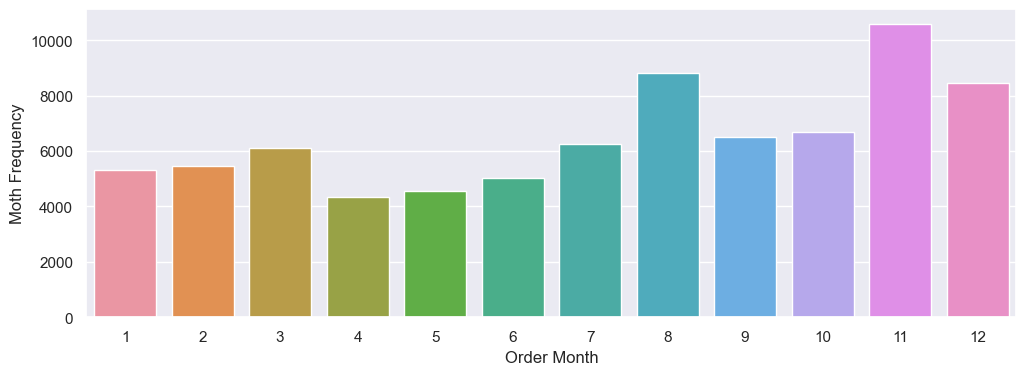

(None, <function matplotlib.pyplot.close(fig=None)>)

In [384]:
# Per month record count plot
plt.figure(figsize = (12, 4))
sns.countplot(data = data_set, x = "Month")
plt.xlabel("Order Month")
plt.ylabel("Moth Frequency")
plt.show(), plt.close

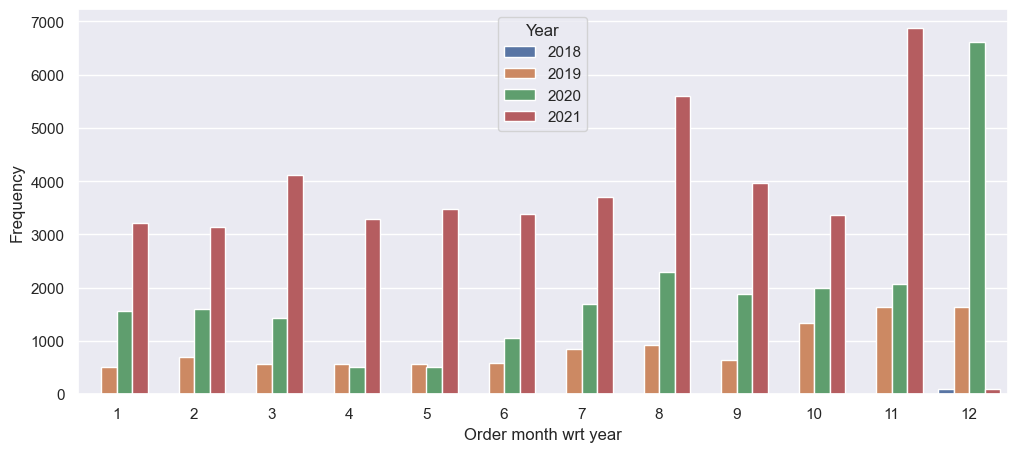

In [385]:
# Month variation with respect to years
plt.figure(figsize = (12, 5))
sns.countplot(data = data_set, x = "Month", hue = "Year")
plt.xlabel("Order month wrt year")
plt.ylabel("Frequency")
plt.show(); plt.close()

In [386]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78087 entries, 1 to 95909
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Order_DateTime  78087 non-null  datetime64[ns, UTC]
 1   Order_ID        78087 non-null  int64              
 2   Product_ID      78087 non-null  int64              
 3   SKU_Quantity    78087 non-null  int64              
 4   Category_ID     78087 non-null  float64            
 5   Category_Alias  78087 non-null  object             
 6   Brand_ID        74719 non-null  float64            
 7   Price_in_USD    78087 non-null  float64            
 8   User_ID         78087 non-null  float64            
 9   Product_Gender  43714 non-null  object             
 10  Main_Color      76212 non-null  object             
 11  Main_Metal      78001 non-null  object             
 12  Main_Gem        60003 non-null  object             
 13  Year            78087 non-null 

In [387]:
# PRODUCT_ID variation with PRICE analysis
data_set["Product_ID"].nunique()

7828

In [388]:
# Get some PRODUCT_ID to check variation with price
data_set["Product_ID"].unique()

array([1842214461889315556, 1835566849434059453, 1873936840742928865, ...,
       1956663836048097738, 1836438006316138671, 1515966223419078514],
      dtype=int64)

In [389]:
# Checking PRICE variation in unique PRODUCT_ID
for value in data_set["Product_ID"].unique():
    df = data_set[data_set["Product_ID"] == value]
    unique_prices = df["Price_in_USD"].nunique()
    if unique_prices > 1:
        print("For Product_ID ", value, ", we have ", unique_prices, " unique prices.")

In [ ]:
# A UNIQUE PRODUCT_ID HAS A UNIQUE PRICE, drop Product_ID - inner invariant

In [390]:
# Checking PRICE variation in unique BRAND_ID
for value in data_set["Brand_ID"].unique():
    df = data_set[data_set["Brand_ID"] == value]
    unique_prices = df["Price_in_USD"].nunique()
    if unique_prices > 1:
        print("For Brand_ID ", value, ", we have ", unique_prices, " unique prices.")

For Brand_ID  1.0 , we have  1673  unique price 
For Brand_ID  0.0 , we have  665  unique price 
For Brand_ID  2.0 , we have  447  unique price 
For Brand_ID  4.0 , we have  18  unique price 
For Brand_ID  5.0 , we have  4  unique price 
For Brand_ID  3.0 , we have  31  unique price 


In [391]:
# Checking PRICE variation in unique Category_ID
for value in data_set["Category_ID"].unique():
    df = data_set[data_set["Category_ID"] == value]
    unique_price = df["Price_in_USD"].nunique()
    if unique_prices > 1:
        print("For Category_ID ", value, ", we have ", unique_prices, " unique prices.")

For Category_ID  1.8068292019159043e+18 , we have  31  unique price 
For Category_ID  1.8068292019242929e+18 , we have  31  unique price 
For Category_ID  1.8068292018907384e+18 , we have  31  unique price 
For Category_ID  1.8068292018823498e+18 , we have  31  unique price 
For Category_ID  1.80682920194107e+18 , we have  31  unique price 
For Category_ID  1.8068292018655726e+18 , we have  31  unique price 
For Category_ID  1.806829202092065e+18 , we have  31  unique price 
For Category_ID  1.313677631878595e+18 , we have  31  unique price 
For Category_ID  1.3136776318953723e+18 , we have  31  unique price 
For Category_ID  1.8068292019746245e+18 , we have  31  unique price 
For Category_ID  1.313677631836652e+18 , we have  31  unique price 
For Category_ID  1.313677632264471e+18 , we have  31  unique price 
For Category_ID  1.3136776319121495e+18 , we have  31  unique price 
For Category_ID  1.3136776320799217e+18 , we have  31  unique price 
For Category_ID  1.313677632096699e+18 ,

In [392]:
# Checking PRICE variation in unique Category_Alias
for value in data_set["Category_Alias"].unique():
    df = data_set[data_set["Category_Alias"] == value]
    unique_price = df["Price_in_USD"].nunique()
    if unique_prices > 1:
        print("For Category_Alias ", value, ", we have ", unique_prices, " unique prices.")

For Category_Alias  jewelry.pendant , we have  31  unique price 
For Category_Alias  jewelry.necklace , we have  31  unique price 
For Category_Alias  jewelry.earring , we have  31  unique price 
For Category_Alias  jewelry.ring , we have  31  unique price 
For Category_Alias  jewelry.brooch , we have  31  unique price 
For Category_Alias  jewelry.bracelet , we have  31  unique price 
For Category_Alias  jewelry.souvenir , we have  31  unique price 
For Category_Alias  jewelry.stud , we have  31  unique price 


In [393]:
# Checking PRICE variation in unique Product_Gender
for value in data_set["Product_Gender"].unique():
    df = data_set[data_set["Product_Gender"] == value]
    unique_price = df["Price_in_USD"].nunique()
    if unique_prices > 1:
        print("For Product_Gender ", value, ", we have ", unique_prices, " unique prices.")

For Product_Gender  f , we have  31  unique prices.
For Product_Gender  nan , we have  31  unique prices.
For Product_Gender  m , we have  31  unique prices.


In [396]:
data_set.columns

Index(['Order_DateTime', 'Order_ID', 'Product_ID', 'SKU_Quantity',
       'Category_ID', 'Category_Alias', 'Brand_ID', 'Price_in_USD', 'User_ID',
       'Product_Gender', 'Main_Color', 'Main_Metal', 'Main_Gem', 'Year',
       'Month'],
      dtype='object')

In [397]:
# Let us drop the original DateTime record (year and month are the needed feature) and SKU_Quantity (Cadinality of 1)
# Drop Order ID and User ID
# Drop year (Keep month) - A year gone forever, but month are repeated yearly
data_set = data_set.drop(["Order_DateTime", "SKU_Quantity", "Order_ID", "User_ID", "Product_ID", "Year"], axis = 1)

In [1]:
data_set.info()

NameError: name 'data_set' is not defined

In [38]:
# Encoding strings as numerical features
# coded_trimed = trimed # preserve the trimed for now

In [39]:
# coded_trimed["Category_Alias"] = coded_trimed["Category_Alias"].fillna("Unknown")
encoded, category_code = pd.factorize(data_set["Category_Alias"]) # for categories
data_set.loc[:, "Category_Alias"] = encoded

encoded, category_code = pd.factorize(data_set["Product_Gender"]) # for genders
data_set.loc[:, "Product_Gender"] = encoded

encoded, category_code = pd.factorize(data_set["Main_Gem"]) # for gem
data_set.loc[:, "Main_Gem"] = encoded

encoded, category_code = pd.factorize(data_set["Main_Metal"]) # for metal
data_set.loc[:, "Main_Metal"] = encoded

encoded, category_code = pd.factorize(data_set["Main_Color"]) # for color
data_set.loc[:, "Main_Color"] = encoded

In [40]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80458 entries, 1 to 95909
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order_DateTime  80458 non-null  object 
 1   Order_ID        80458 non-null  int64  
 2   Product_ID      80458 non-null  int64  
 3   SKU_Quantity    80458 non-null  int64  
 4   Category_ID     80458 non-null  float64
 5   Category_Alias  80458 non-null  int64  
 6   Brand_ID        76991 non-null  float64
 7   Price_in_USD    80458 non-null  float64
 8   User_ID         80458 non-null  float64
 9   Product_Gender  80458 non-null  int64  
 10  Main_Color      80458 non-null  int64  
 11  Main_Metal      80458 non-null  int64  
 12  Main_Gem        80458 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 8.6+ MB


In [41]:
# Correlation metrix
correlations = coded_trimed.drop(labels = ["Order_DateTime", "Product_ID", "Order_ID", "User_ID"], axis = 1).corr(method = "spearman")
correlations

,SKU_Quantity,Category_ID,Category_Alias,Brand_ID,Price_in_USD,Product_Gender,Main_Color,Main_Metal,Main_Gem
SKU_Quantity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category_ID,NaN,1.000000,-0.886212,0.111328,-0.296495,0.106286,0.003396,0.157834,0.050483
Category_Alias,NaN,-0.886212,1.000000,-0.111680,0.267257,-0.124101,-0.059402,0.105056,-0.082944
Brand_ID,NaN,0.111328,-0.111680,1.000000,-0.018428,0.623701,0.100816,0.003835,0.076277
Price_in_USD,NaN,-0.296495,0.267257,-0.018428,1.000000,0.049532,0.013177,-0.173050,-0.006630
Product_Gender,NaN,0.106286,-0.124101,0.623701,0.049532,1.000000,0.056950,-0.046436,0.166125
Main_Color,NaN,0.003396,-0.059402,0.100816,0.013177,0.056950,1.000000,-0.238080,0.136232
Main_Metal,NaN,0.157834,0.105056,0.003835,-0.173050,-0.046436,-0.238080,1.000000,-0.055603
Main_Gem,NaN,0.050483,-0.082944,0.076277,-0.006630,0.166125,0.136232,-0.055603,1.000000


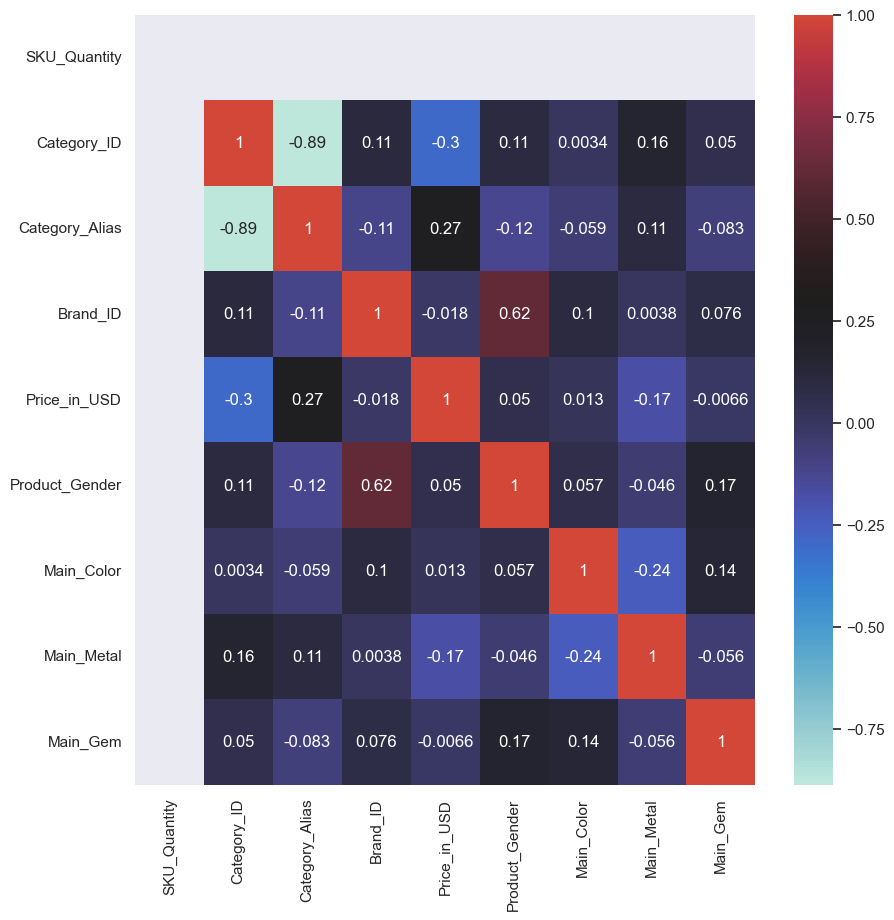

In [42]:
plt.figure(figsize = (10, 10))
sns.heatmap(correlations, annot = True, center = 0.3)
plt.show(); plt.close()

In [43]:
# Set the correlation limits and see features that fall the set limits
upper = 1
lower = 0.2
correlated_colums = {
    column: correlations[(correlations[column] > lower) & (upper > correlations[column])].index.tolist()
    for column in correlations.columns
}
correlated_colums

{'SKU_Quantity': [],
 'Category_ID': [],
 'Category_Alias': ['Price_in_USD'],
 'Brand_ID': ['Product_Gender'],
 'Price_in_USD': ['Category_Alias'],
 'Product_Gender': ['Brand_ID'],
 'Main_Color': [],
 'Main_Metal': [],
 'Main_Gem': []}

In [44]:
# NOTE: Only 'Category_Alias' correlates with the targeted feature (price)

In [45]:
# DATA PREPARATION for Linear Regression


In [ ]:
# Import libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Define features (X) and target (y)
X = df[["Category_ID", "Category_ID", "Category_Alias", "Product_Gender", "Main_Color", "Main_Metal", "Main_Gem", "Month"]]
y = df["Price_in_USD"]

In [ ]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

In [ ]:
# View coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

In [50]:
# For data spliting, import
from sklearn.model_selection import train_test_split

In [51]:
# Separate features from labels
X, y = data_set.drop(labels = ["Price_in_USD"], axis = 1), coded_trimed["Price_in_USD"]

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)

In [68]:
y_train.head()

5367     209.81
4263     520.41
74324     83.42
25979    629.22
30423     77.95
Name: Price_in_USD, dtype: float64

In [ ]:
# DATA MODELING

In [55]:
!pip install catboost

In [56]:
# To encode our categorical features, we
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder
from sklearn.compose import TransformedTargetRegressor, ColumnTransformer
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor, ExtraTreesRegressor
from catboost import CatBoostRegressor

In [57]:
from sklearn.pipeline import Pipeline

In [58]:
# Building the pipeline
def generate_pipeline(model, column_indices, categorical_indices, fill_missing = True, one_hot = True, label_encode = False):
    # fix missing values
    first_transformer = ColumnTransformer(
    transformer = [
        ("imputer", SimpleImputer(strategy = "most_frequent"), column_indices)
    ],
        remainder = "passthrough",
        sparse_threshold = 0
    )
    # one hot encode
    second_transformer = ColumnTransformer(
    transformer = [
        ("one_hot", OneHotEncoder(), categorical_indices)
    ],
        remainder = "passthrough",
        sparse_threshold = 0
    )
    # label encode
    third_transformer = ColumnTransformer(
    transformers = [
        ("ordinal", OrdinalEncoder(), categorical_indices)
    ],
        remainder = "passthrough",
        sparse_threshold = 0
    )
    
    steps = []
    if fill_missing:
        step.append(("first", first_transformer))
    if label_encode:
        step.append(("third", third_transformer))
    if one_hot:
        step.append(("second", second_transformer))
        
    steps.append(("model", model))
    
    model_pipe = Pipeline(steps = steps)
    
    return model_pipe

In [60]:
x.head()

,Category_Alias,Brand_ID,Product_Gender,Main_Color,Main_Metal,Main_Gem
1,0,1.0,0,0,0,0
2,0,0.0,0,1,0,1
3,1,0.0,-1,1,0,2
4,2,1.0,-1,1,0,-1
5,2,0.0,-1,1,0,1


In [61]:
# Determining the indices
columns = x.columns.tolist()

column_indices = [columns.index(c) for c in columns]
categorical_features = [c for c in columns if c not in ["Brand_ID"]]
categorical_indices = [columns.index(c) for c in categorical_features]

In [65]:
categorical_indices

[0, 2, 3, 4, 5]

In [ ]:
# Catboost pipeline 06:10 of DataModelingII

In [ ]:
# Linear Regression (LR) pipeline 06:32

In [ ]:
# Adaboost pipiline

In [ ]:
# ExtraTree pipeline
